In [33]:
 import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [34]:
import seaborn as sns
iris=sns.load_dataset("iris")

In [35]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
iris['species']= label_encoder.fit_transform(iris['species']) 

In [37]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
x=iris.iloc[:,0:4]#features
y=iris['species']#target variable

In [39]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [41]:
iris['species'].unique()

array([0, 1, 2])

In [42]:
iris.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [43]:
colnames = list(iris.columns)
colnames

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [44]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [45]:
y_train

28     0
109    2
16     0
97     1
49     0
      ..
129    2
71     1
43     0
91     1
33     0
Name: species, Length: 120, dtype: int32

### Building Decision Tree Classifier using Gini Criteria

In [46]:
model = DecisionTreeClassifier(criterion = 'gini',min_samples_split=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=5)

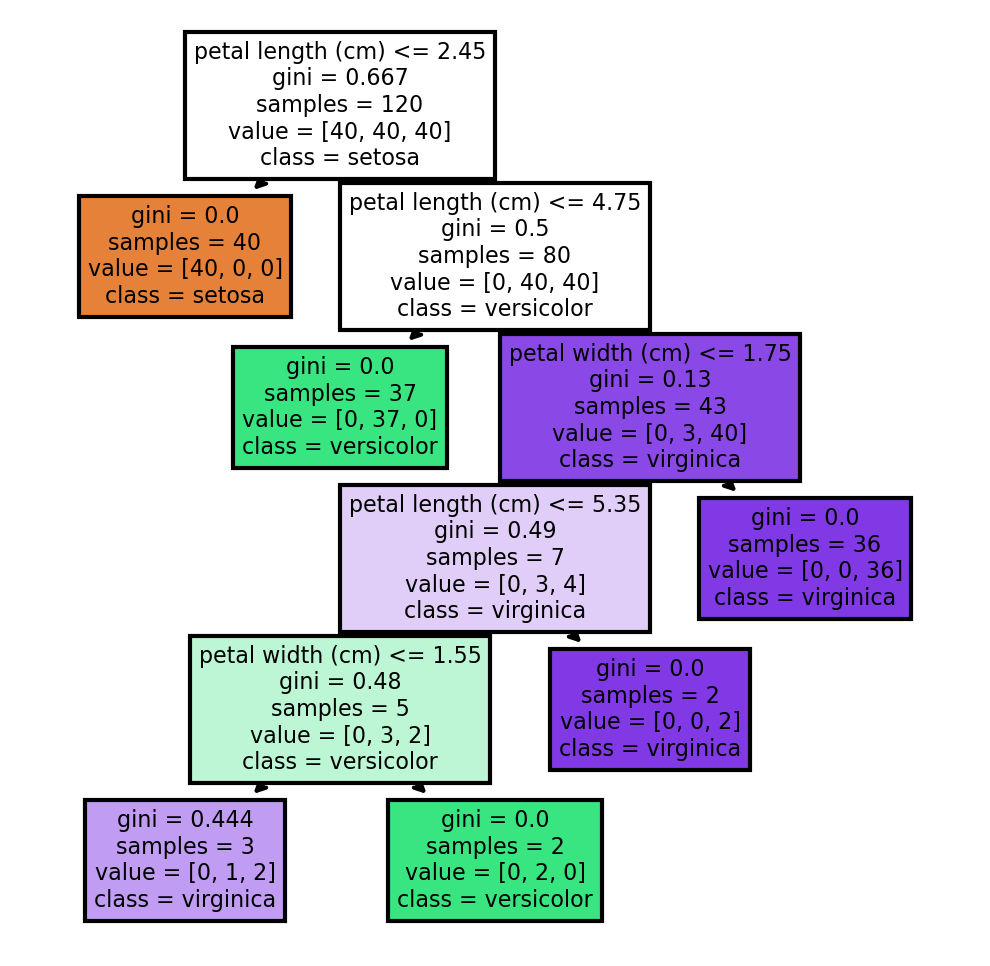

In [47]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [55]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

2    12
0    10
1     8
dtype: int64

In [56]:
from sklearn import metrics
metrics.accuracy_score(y_pred,Y_test)

0.8666666666666667

### Building Decision Tree Classifier (CART) using Entropy Criteria

In [32]:

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3,)

In [19]:
y_train

108    2
118    2
82     1
83     1
125    2
      ..
144    2
61     1
98     1
72     1
117    2
Name: species, Length: 120, dtype: int32

In [20]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [21]:
#Prediction and computing the accuracy
preds=model.predict(x_test)
metrics.accuracy_score(preds,y_test)

0.9333333333333333

# Decision Tree Regression Example

In [22]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [23]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
array = iris.values
X = array[:,0:3]
y = array[:,3]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=True, random_state=1)

In [26]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [27]:
#Find the mse
from sklearn import metrics
pred=model.predict(X_test)
metrics.mean_squared_error(y_test,pred)

0.03921150254212944

In [28]:
metrics.mean_absolute_percentage_error(y_test,pred)

0.1392255406795081

In [29]:
np.mean(np.abs(y_test-pred)/np.array(y_test))

0.1392255406795081

[Text(0.5, 0.875, 'x[2] <= 2.6\nsquared_error = 0.599\nsamples = 100\nvalue = 1.205'),
 Text(0.25, 0.625, 'x[0] <= 4.95\nsquared_error = 0.012\nsamples = 33\nvalue = 0.23'),
 Text(0.125, 0.375, 'x[1] <= 2.6\nsquared_error = 0.003\nsamples = 17\nvalue = 0.188'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 0.3'),
 Text(0.1875, 0.125, 'squared_error = 0.003\nsamples = 16\nvalue = 0.181'),
 Text(0.375, 0.375, 'x[2] <= 1.55\nsquared_error = 0.018\nsamples = 16\nvalue = 0.275'),
 Text(0.3125, 0.125, 'squared_error = 0.008\nsamples = 10\nvalue = 0.23'),
 Text(0.4375, 0.125, 'squared_error = 0.026\nsamples = 6\nvalue = 0.35'),
 Text(0.75, 0.625, 'x[2] <= 4.75\nsquared_error = 0.19\nsamples = 67\nvalue = 1.685'),
 Text(0.625, 0.375, 'x[2] <= 4.15\nsquared_error = 0.039\nsamples = 27\nvalue = 1.267'),
 Text(0.5625, 0.125, 'squared_error = 0.018\nsamples = 13\nvalue = 1.115'),
 Text(0.6875, 0.125, 'squared_error = 0.018\nsamples = 14\nvalue = 1.407'),
 Text(0.875, 0.375, 'x[1]

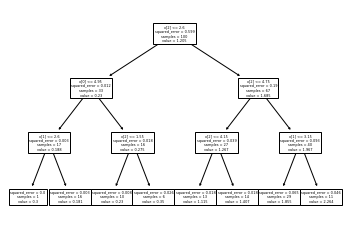

In [30]:
tree.plot_tree(model)

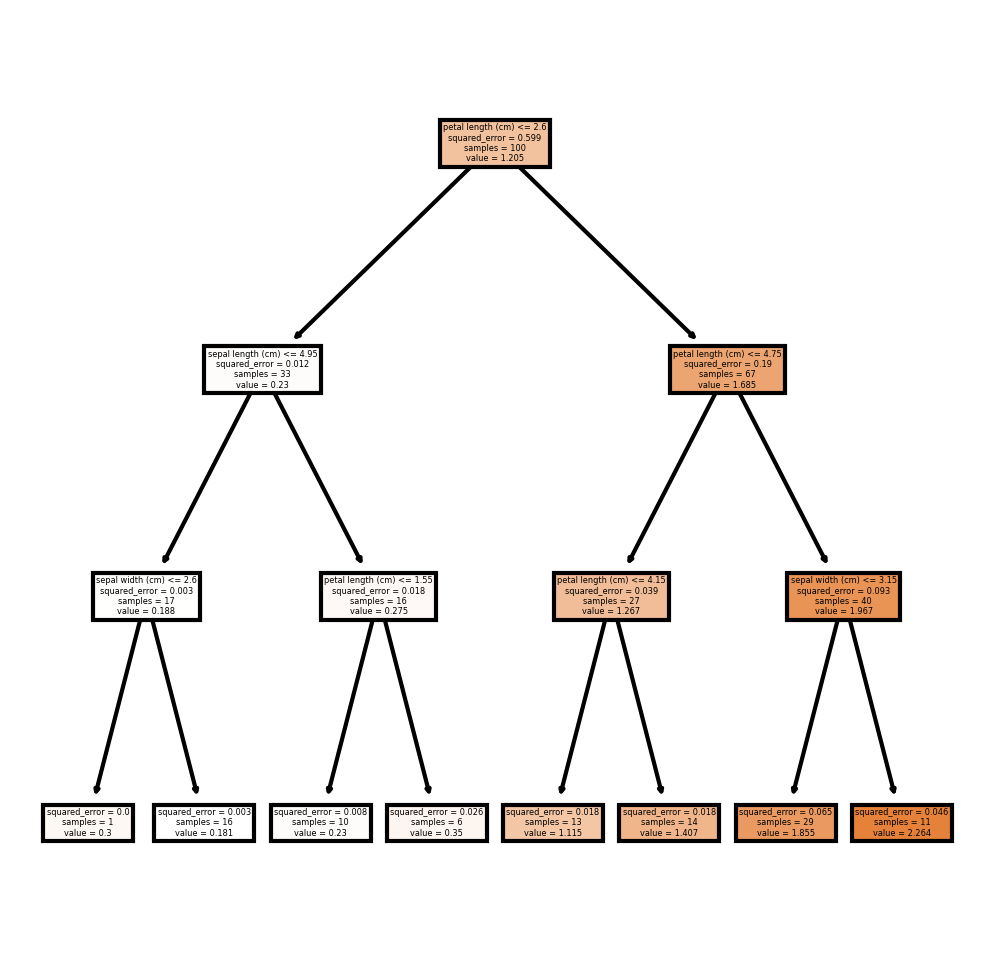

In [31]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)']
cn=['petal width (cm)']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);